Business Understanding

Baseball is a sport about discrete, quantifiable events, and as such has always lended itself towards statistics. While a player is up at bat, their statistics showing how likely they are to get a hit are thrown up on the TV screen. While a pitcher is pitching, the broadcast shows how many runs they give up, on average. The importance of these stats go beyond passing interest for fans, as data analysts are also hired by the teams themselves to scout out players of interest to trade, draft, or sign onto the ballclub using these statistics. While in the past, statisticians used simpler stats such as batting average (hits / at-bats) or earned run average (earned-runs * 9 / innings-pitched), in recent years a wider array of more advanced descriptive stats and predictive stats have been used due to the influence of sabermetrics [1]. Sabermetrics, from SABR (Society of American Baseball Research), is the study and use of advanced statistics in baseball, guided by SABR's goal of  “the search for objective knowledge about baseball.” [2]

Recently, pitch tracking software has greatly enhanced the breadth of data sabermetricians have available, and since 2015, every MLB ballpark has a combination of radar and camera tracking technology to collect even more data for analysts with a system called Statcast [3]. The dataset used in this project is the Statcast data from 2018 and 2019. While data exists up to the 2021 season (and soon 2022), I chose these two years because of an interesting increase of home runs hit that occurred in 2019. The increase is due to a manufacturing change in the baseballs used, unintentionally making them more aerodynamic, and therefore more likely to fly out of the park [4]. This isn't the first time that a manufacturing change has possibly led to an increase in home runs hit, balls produced after halfway through the 2015 season were bouncier and lighter, and those produced after 2016 were more aerodynamic as well [5]. My goal is to see the effect of these "juiced" baseballs through the lens of statistics.



References:
1) Mizels J, Erickson B, Chalmers P. Current State of Data and Analytics Research in Baseball. Curr Rev Musculoskelet Med. 2022 Aug;15(4):283-290. doi: 10.1007/s12178-022-09763-6. Epub 2022 Apr 29. PMID: 35486325; PMCID: PMC9276858.

2) "A Guide to Sabermetric Reasearch." Society for American Baseball Research. sabr.org/sabermetrics. 

3) "Statcast." Major League Baseball. www.mlb.com/glossary/statcast

4) Calcaterra, Craig. "MLB report blames seam height, not juiced balls, for 2019 home run surge." NBC Sports, 11 Dec. 2019, mlb.nbcsports.com/2019/12/11/mlb-report-blames-seam-height-not-juiced-balls-for-2019-home-run-surge/

5) Arthur, Rob & Dix, Tim "We X-Rayed Some MLB Baseballs. Here’s What We Found." FiveThirtyEight, 1 Mar. 2018, fivethirtyeight.com/features/juiced-baseballs/

In [1]:
import pandas as pd
sc2018 = pd.read_csv('Statcast_2018.csv')
sc2019 = pd.read_csv('Statcast_2019.csv')

# uncomment these rows if the data set is too large.
sc2018 = sc2018.sample(10000) 
sc2019 = sc2019.sample(10000) 

In [2]:
sc2019.head()

,Unnamed: 0,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
245887,217,FF,2019-07-31,92.8,-1.21,6.47,"Giolito, Lucas",453943,608337,NaN,...,1,1,1,1,1,Infield shift,Standard,208.0,0.000,0.037
53421,1142,FF,2019-09-17,93.1,-1.82,5.62,"Webb, Logan",593523,657277,force_out,...,1,1,1,1,1,Standard,Standard,209.0,-0.077,-0.653
262775,3677,CH,2019-07-27,87.5,-1.33,6.65,"Baez, Michel",456781,673258,strikeout,...,5,1,5,1,5,Standard,Standard,252.0,0.009,-0.156
322153,976,CH,2019-07-13,85.0,-2.77,5.71,"Roark, Tanner",641857,543699,grounded_into_double_play,...,4,4,5,5,4,Standard,Standard,228.0,-0.077,-0.445
364719,3720,FF,2019-06-29,89.9,-0.72,6.82,"Cashner, Andrew",467793,488768,NaN,...,0,0,0,0,0,Infield shift,Standard,197.0,0.000,-0.021


The data sets used are the Statcast data from the 2018 and 2019 MLB regular season. This data records what happens on every pitch in the baseball regular season. There are many attributes that are extreneous to my goal, but the ones I am interested in are: game_date (categorical), game_year (quantitative), player_name (categorical), pitch_type (categorical), release_speed (quantitative, in MPH), release_spin_rate (quantitative, in RPM), events (categorical), type (categorical), hit_distance_sc (quantitative, in Feet), launch_speed (quantitative, in MPH), launch_angle (quantitative, in degrees above horizontal). In the 2018 data set, there are 721,190 instances and in the 2019 data set there are 732,473 instances.

In [3]:
sc2019_relevant = sc2019[['game_date', 'game_year', 'player_name', 'pitch_type', 'release_speed', 'release_spin_rate', 
                          'events', 'type', 'hit_distance_sc', 'launch_speed', 'launch_angle']]
sc2019_relevant.head()

,game_date,game_year,player_name,pitch_type,release_speed,release_spin_rate,events,type,hit_distance_sc,launch_speed,launch_angle
245887,2019-07-31,2019,"Giolito, Lucas",FF,92.8,2325.0,NaN,B,NaN,NaN,NaN
53421,2019-09-17,2019,"Webb, Logan",FF,93.1,2101.0,force_out,X,NaN,82.9,-21.0
262775,2019-07-27,2019,"Baez, Michel",CH,87.5,1804.0,strikeout,S,NaN,NaN,NaN
322153,2019-07-13,2019,"Roark, Tanner",CH,85.0,1804.0,grounded_into_double_play,X,48.0,101.1,0.0
364719,2019-06-29,2019,"Cashner, Andrew",FF,89.9,2024.0,NaN,S,NaN,NaN,NaN


In [4]:
sc2018_relevant = sc2018[['game_date', 'game_year', 'player_name', 'pitch_type', 'release_speed', 'release_spin_rate', 
                          'events', 'type', 'hit_distance_sc', 'launch_speed', 'launch_angle']]
sc2018_relevant.head()

,game_date,game_year,player_name,pitch_type,release_speed,release_spin_rate,events,type,hit_distance_sc,launch_speed,launch_angle
618710,2018-04-25,2018,"Finnegan, Brandon",SL,80.2,2576.0,NaN,S,NaN,NaN,NaN
614830,2018-04-25,2018,"Scherzer, Max",FF,92.1,2376.0,NaN,S,167.0,69.0,29.0
156833,2018-08-22,2018,"McGuire, Deck",FF,93.5,2406.0,walk,B,NaN,NaN,NaN
621830,2018-04-24,2018,"Smith, Joe",SI,87.6,1867.0,field_out,X,13.0,36.6,-5.0
516969,2018-05-20,2018,"Teheran, Julio",SL,82.0,2605.0,hit_by_pitch,B,NaN,NaN,NaN


In [5]:
sc2019_relevant.describe()

,game_year,release_speed,release_spin_rate,hit_distance_sc,launch_speed,launch_angle
count,10000.0,9903.00000,9747.000000,2536.000000,2662.000000,2662.000000
mean,2019.0,88.65984,2259.342772,163.402997,84.046356,16.089031
std,0.0,5.97456,323.146532,123.290571,14.147245,28.866198
min,2019.0,52.60000,682.000000,0.000000,31.700000,-77.000000
25%,2019.0,84.50000,2108.000000,31.000000,73.900000,-4.000000
50%,2019.0,89.90000,2277.000000,169.000000,83.000000,17.000000
75%,2019.0,93.40000,2447.500000,255.000000,95.700000,36.000000
max,2019.0,102.40000,3627.000000,489.000000,115.600000,89.000000


In [6]:
sc2018_relevant.describe()

,game_year,release_speed,release_spin_rate,hit_distance_sc,launch_speed,launch_angle
count,10000.0,9938.000000,9791.000000,2659.000000,2782.000000,2781.000000
mean,2018.0,88.558795,2228.139209,159.716811,83.781560,15.193096
std,0.0,5.929036,311.265437,123.091012,14.567074,28.957009
min,2018.0,58.900000,461.000000,0.000000,15.800000,-81.000000
25%,2018.0,84.300000,2080.000000,24.000000,73.400000,-5.000000
50%,2018.0,89.900000,2245.000000,165.000000,83.100000,16.000000
75%,2018.0,93.100000,2409.000000,257.000000,95.800000,34.000000
max,2018.0,102.800000,3568.000000,451.000000,117.500000,89.000000


Firstly, at a quick glance I am impressed by how little changes there are year to year. The median pitch speed only increased by 0.1 mph, while spin rate only dropped by 1.2%. Also of note is that the median launch angle did not change. In recent years, it has been determined that an optimal launch angle is between 15 and 20 degrees so a median launch angle of 18 degrees and an average of 16.5 degrees makes sense in that context.

In [7]:
home_runs2019 = sc2019_relevant.loc[sc2019_relevant.events=='home_run']
home_runs2018 = sc2018_relevant.loc[sc2018_relevant.events=='home_run']

Here we are only looking at when a pitch resulted in a home run.

In [8]:
home_runs2019.describe()

,game_year,release_speed,release_spin_rate,hit_distance_sc,launch_speed,launch_angle
count,84.0,82.000000,81.000000,82.000000,82.000000,82.000000
mean,2019.0,89.579268,2242.271605,398.707317,103.996341,27.621951
std,0.0,5.824040,322.184071,24.821580,4.260193,5.337129
min,2019.0,74.700000,729.000000,343.000000,93.700000,18.000000
25%,2019.0,85.050000,2117.000000,381.000000,100.775000,24.000000
50%,2019.0,91.250000,2274.000000,396.500000,104.100000,27.000000
75%,2019.0,94.075000,2411.000000,417.000000,107.575000,31.000000
max,2019.0,98.500000,3184.000000,449.000000,112.000000,43.000000


In [9]:
home_runs2018.describe()

,game_year,release_speed,release_spin_rate,hit_distance_sc,launch_speed,launch_angle
count,81.0,81.000000,79.000000,80.000000,81.000000,81.000000
mean,2018.0,88.254321,2235.316456,394.762500,103.793827,27.691358
std,0.0,5.511149,254.446032,26.491577,5.380645,5.358736
min,2018.0,74.400000,1466.000000,337.000000,89.400000,16.000000
25%,2018.0,84.300000,2063.000000,374.750000,100.000000,24.000000
50%,2018.0,90.000000,2207.000000,396.500000,104.400000,28.000000
75%,2018.0,92.700000,2414.500000,414.250000,107.100000,31.000000
max,2018.0,96.300000,2924.000000,451.000000,117.500000,45.000000


Here we see that the median hit distance of home runs is 3 feet longer in 2019, while the launch speed (that is the speed of the ball after it is hit) and launch angle remains the same. This give credence to the claim by the MLB that the balls used in 2019 are more aerodynamic but otherwise weren't different. The balls are flying further however they are not being hit harder and are being hit at the same angle on average. It's also very interesting how the increase in hit distance is the same for home runs as it is for all balls hit into play. In addition, you can see just how many more home runs there were in 2019. 

In [10]:
sc_relevant = pd.concat([sc2018_relevant,sc2019_relevant])

Combining the data sets for further analysis

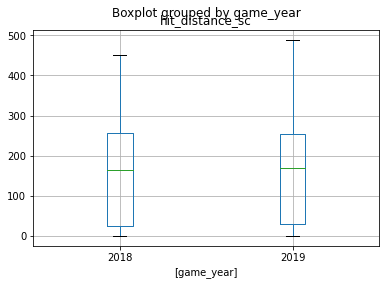

In [11]:
boxplot = sc_relevant.boxplot(column=['hit_distance_sc'], by=['game_year'])

The change is still small nevertheless. However, because a ball hit into play is either a home run or not depending on the distance (and height) its hit, a small change can result in a significant increase of home runs. 

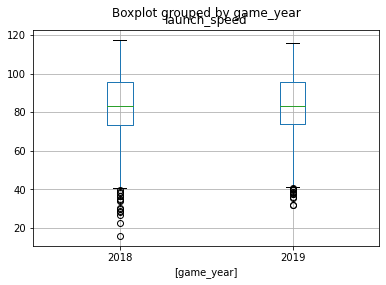

In [12]:
boxplot = sc_relevant.boxplot(column=['launch_speed'], by=['game_year'])

There are quite a few outliers here. Looking through the data, some of this can be attributed to incorrect or missing data (I've seen something described as a home run hit 0 ft) , but there's also just going to be balls that were hit directly into the ground.

In [13]:
sc_dropped = sc_relevant.dropna(subset=['hit_distance_sc', 'launch_speed'])

I want to create normalized attributes, but first I need to remove the missing values in hit_distance_sc and launch_speed.

In [14]:
from scipy import stats 
sc_dropped['hitd_zscores'] = stats.zscore(sc_dropped['hit_distance_sc'])
sc_dropped['launch_speed_zscores'] = stats.zscore(sc_dropped['launch_speed'])

C:\Users\Aidan\AppData\Local\Temp/ipykernel_15856/2247255986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_dropped['hitd_zscores'] = stats.zscore(sc_dropped['hit_distance_sc'])
C:\Users\Aidan\AppData\Local\Temp/ipykernel_15856/2247255986.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc_dropped['launch_speed_zscores'] = stats.zscore(sc_dropped['launch_speed'])


Creating normalized attributes for hit distance and launch speed to directly compare them.

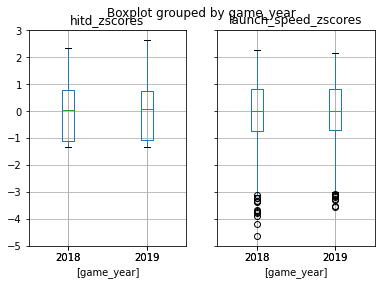

In [15]:
boxplot = sc_dropped.boxplot(column=['hitd_zscores','launch_speed_zscores'], by=['game_year'])

The box plots seem to be very similar, perhaps if we compared hit distance against the euclidean distance between launch angle and launch speed we would get a more full picture. However, I am unaware of how to do that using pandas.

To prepare the data for modeling I will replace some of the missing values in a different way than before. We will primarily be looking at pitch speed and spin rate compared to outcome.

In [34]:
sc_relevant.dropna(subset=['game_year', 'pitch_type', 'release_speed', 'release_spin_rate', 'type'], inplace=True)
sc_relevant.fillna({'hit_distance_sc':0, 'launch_speed':0, 'launch_angle':0, 'events':'None'}, inplace=True)

If there is no pitch data, we want to drop the row, as we only want to look at data for pitches. However, most pitches do not end in a hit, so we do not want to drop the data relating to hits that has no value. Instead we want to replace the missing cell with 0; a ball that isn't hit has a launch speed of zero.

In [17]:
sc_relevant['pitch_type_num'] = sc_relevant['pitch_type']
type_dict = {}

for ptype in sc_relevant['pitch_type'].unique():
    if ptype[0] == 'F' or ptype == 'SI':
        type_dict[ptype] = 0
    else:
        type_dict[ptype] = 1

sc_relevant['pitch_type_num'].replace(type_dict, inplace=True)

Quantifying the Pitch Type attribute for modeling. Every fastball is set to 0, whereas every other type of pitch is set to 1. In pitch abbreviations, F is for fastball and SI stands for sinker (which is a type of fastball).

In [18]:
sc_relevant['type_num'] = sc_relevant['type']
type_dict = {'S':0, 'B':0, 'X':1}
sc_relevant['type_num'].replace(type_dict, inplace=True)

Quantifying the Type attribute for modeling. Type refers to whether a pitch ended as a strike (S), a ball (B), or something else (X).

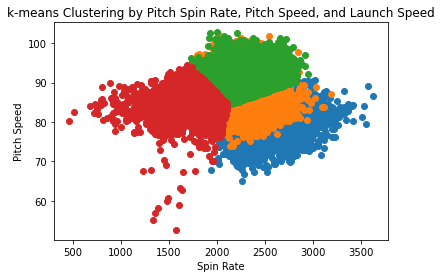

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
speed = sc_relevant[['release_spin_rate', 'release_speed', 'launch_speed']]
speedz = pd.DataFrame(stats.zscore(speed), columns=['release_spin_rate', 'release_speed', 'launch_speed'])
kmeans01 = KMeans(n_clusters=4).fit(speedz)
labels = kmeans01.labels_
sc_relevant['labels'] = labels

for label in sc_relevant["labels"].unique():
    plt.scatter(sc_relevant[labels == label]['release_spin_rate'], sc_relevant[labels == label]['release_speed'])

plt.title('k-means Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed') 
plt.xlabel('Spin Rate') 
plt.ylabel('Pitch Speed')
plt.show()

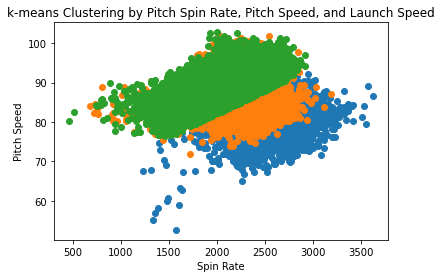

In [20]:
kmeans01 = KMeans(n_clusters=3).fit(speedz)
labels = kmeans01.labels_
sc_relevant['labels'] = labels
plt.clf()
for label in sc_relevant["labels"].unique():
    plt.scatter(sc_relevant[labels == label]['release_spin_rate'], sc_relevant[labels == label]['release_speed'])

plt.title('k-means Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed') 
plt.xlabel('Spin Rate') 
plt.ylabel('Pitch Speed')
plt.show()

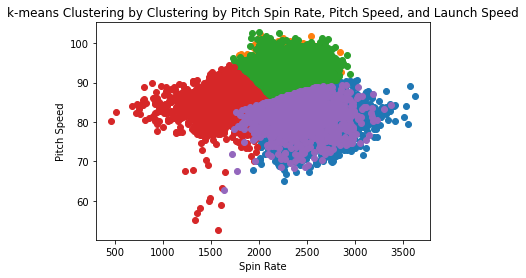

In [21]:
kmeans01 = KMeans(n_clusters=5).fit(speedz)
labels = kmeans01.labels_
sc_relevant['labels'] = labels
plt.clf()
for label in sc_relevant["labels"].unique():
    plt.scatter(sc_relevant[labels == label]['release_spin_rate'], sc_relevant[labels == label]['release_speed'])

plt.title('k-means Clustering by Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed') 
plt.xlabel('Spin Rate') 
plt.ylabel('Pitch Speed')
plt.show()

I found k=4 to work the best through multiple trials, however it does make sense. There are 4 major pitch groups: fastballs, sliders, curves, and changeups.

In [22]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=.2, min_samples=2).fit(speedz)
labels_db = db.labels_
labels_db
sc_relevant["labels_db"] = labels_db

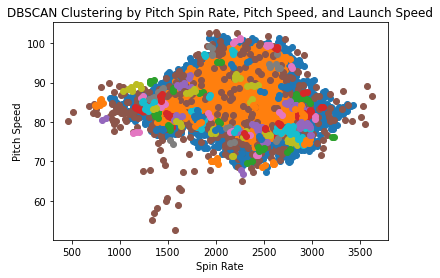

In [23]:
plt.clf()
for label in sc_relevant["labels_db"].unique():
    plt.scatter(sc_relevant[labels_db == label]['release_spin_rate'], sc_relevant[labels_db == label]['release_speed'])
plt.title('DBSCAN Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed')
plt.xlabel('Spin Rate') 
plt.ylabel('Pitch Speed')
plt.show()

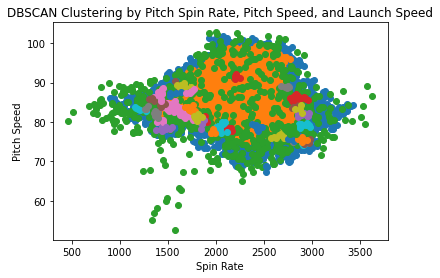

In [24]:
db = DBSCAN(eps=.2, min_samples=4).fit(speedz)
labels_db = db.labels_
labels_db
sc_relevant["labels_db"] = labels_db
plt.clf()
for label in sc_relevant["labels_db"].unique():
    plt.scatter(sc_relevant[labels_db == label]['release_spin_rate'], sc_relevant[labels_db == label]['release_speed'])
plt.title('DBSCAN Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed')
plt.xlabel('Spin Rate') 
plt.ylabel('Pitch Speed')
plt.show()

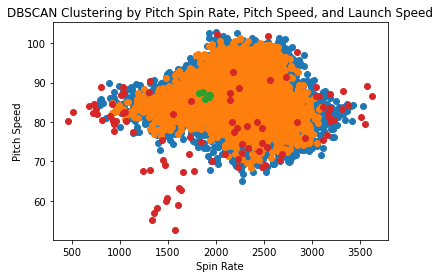

In [56]:
db = DBSCAN(eps=.4, min_samples=5).fit(speedz)
labels_db = db.labels_
labels_db
sc_relevant["labels_db"] = labels_db
plt.clf()
for label in sc_relevant["labels_db"].unique():
    plt.scatter(sc_relevant[labels_db == label]['release_spin_rate'], sc_relevant[labels_db == label]['release_speed'])
plt.title('DBSCAN Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed')
plt.xlabel('Spin Rate') 
plt.ylabel('Pitch Speed')
plt.show()

Through some trial and error, I've found epsilon = 0.4 and minimum samples = 5 to be the best.

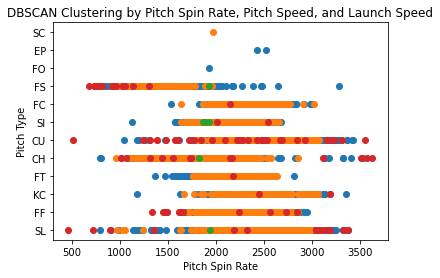

In [57]:
for label in sc_relevant["labels_db"].unique():
    plt.scatter(sc_relevant[labels_db == label]['release_spin_rate'], sc_relevant[labels_db == label]['pitch_type'])
plt.title('DBSCAN Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed')
plt.xlabel('Pitch Spin Rate') 
plt.ylabel('Pitch Type')
plt.show()

An interesting version of the prior graph.

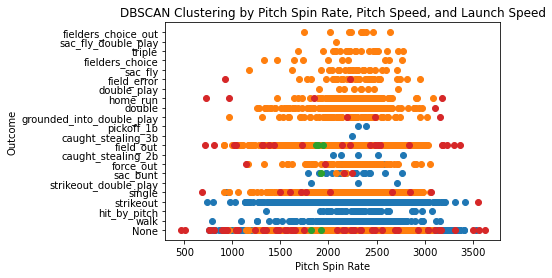

In [65]:
for label in sc_relevant["labels_db"].unique():
    plt.scatter(sc_relevant[labels_db == label]['release_spin_rate'], sc_relevant[labels_db == label]['events'])
plt.title('DBSCAN Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed')
plt.xlabel('Pitch Spin Rate') 
plt.ylabel('Outcome')
plt.show()

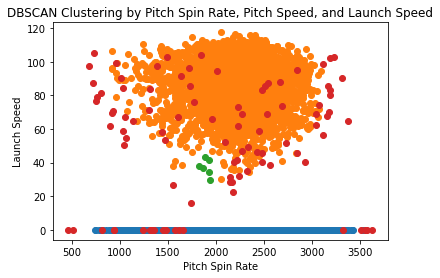

In [113]:
for label in sc_relevant["labels_db"].unique():
    plt.scatter(sc_relevant[labels_db == label]['release_spin_rate'], sc_relevant[labels_db == label]['launch_speed'])
plt.title('DBSCAN Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed')
plt.xlabel('Pitch Spin Rate') 
plt.ylabel('Launch Speed')
plt.show()

In [111]:
kmeans01 = KMeans(n_clusters=4).fit(speedz)
labels = kmeans01.labels_
sc_relevant['labels'] = labels

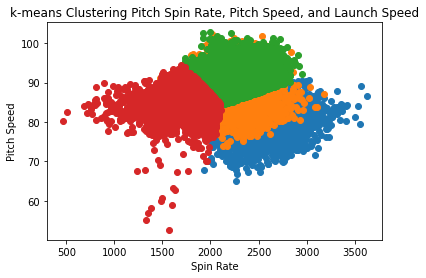

In [112]:
plt.clf()
for label in sc_relevant["labels"].unique():
    plt.scatter(sc_relevant[labels == label]['release_spin_rate'], sc_relevant[labels == label]['release_speed'])

plt.title('k-means Clustering Pitch Spin Rate, Pitch Speed, and Launch Speed') 
plt.xlabel('Spin Rate') 
plt.ylabel('Pitch Speed')
plt.show()

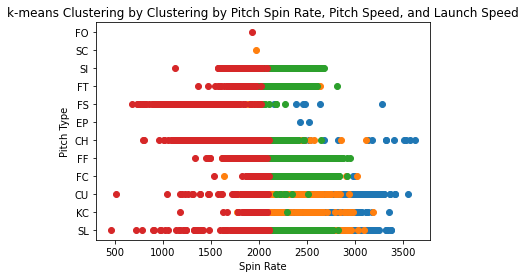

In [97]:
for label in sc_relevant["labels"].unique():
    plt.scatter(sc_relevant[labels == label]['release_spin_rate'], sc_relevant[labels == label]['pitch_type'])

plt.title('k-means Clustering by Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed') 
plt.xlabel('Spin Rate') 
plt.ylabel('Pitch Type')
plt.show()

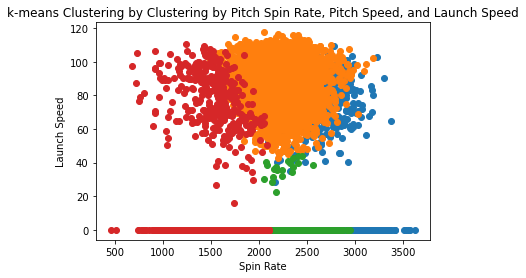

In [31]:
for label in sc_relevant["labels"].unique():
    plt.scatter(sc_relevant[labels == label]['release_spin_rate'], sc_relevant[labels == label]['launch_speed'])

plt.title('k-means Clustering by Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed') 
plt.xlabel('Spin Rate') 
plt.ylabel('Launch Speed')
plt.show()

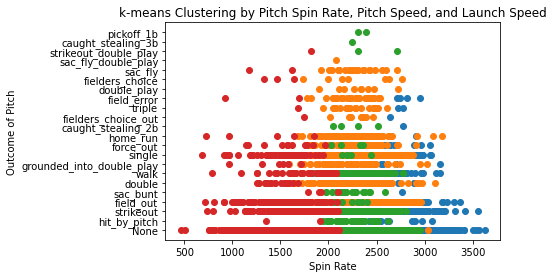

In [37]:
for label in sc_relevant["labels"].unique():
    plt.scatter(sc_relevant[labels == label]['release_spin_rate'], sc_relevant[labels == label]['events'])

plt.title('k-means Clustering by Pitch Spin Rate, Pitch Speed, and Launch Speed') 
plt.xlabel('Spin Rate') 
plt.ylabel('Outcome of Pitch')
plt.show()

Evaluation

Through data visualization and descriptive statistics, the probable effect and possible cause of the ball change can be seen. When hit, they were flying further, around 3 feet on average. However, the launch speed of hits in 2018 and 2019 shows the balls themselves were not being hit harder. Also launch angle remained similar. This indicates that there is a change in the ball that affects its aerodynamics, but not its other physical properties. Through that data, you could deduce that there is a change in the shape of the ball is affecting its flight. Ultimately that is what the MLB had found, lowered seams on the baseball caused by a manufacturing change reduced its drag which led to the year with the most home runs ever.

For modeling, I instead turned my attention toward pitch speed, pitch spin rate, and the outcome of the pitch for which I used launch speed. Balls hit harder are more likely to lead to a player on base or homeruns. K-means seems to be better for modeling in this situation, as DBSCAN was clustering balls that did not end up in play all together, because they had a launch speed of 0. Through the visualizations of the K-means clustering, I see something interesting however. Few balls that were thrown with very high spin rates were put into play and the same is true for balls that had very high speeds. In addition, a majority of balls in play seem to be of both middling speed and velocity. In addition, balls with high spin rates are very rarely hit for a home run.